# R package : flexsurv 

The flexsurv package in R is designed for flexible parametric modeling of survival data. It offers a comprehensive suite of tools for fitting various survival models, including custom distributions, which makes it particularly useful for more complex survival analysis scenarios.

### Key Features

#### Flexible Parametric Models: 
Supports a wide range of parametric distributions for modeling survival data, including exponential, Weibull, log-logistic, log-normal, generalized gamma, and more.

#### Custom Distributions:
Users can define their own custom survival distributions if the pre-defined ones do not meet their needs.

#### Multi-state Models:
Provides tools for modeling multi-state processes where individuals transition between different states over time.

#### Cure Models:
Allows for fitting mixture and non-mixture cure models, where a fraction of the population is considered "cured".

#### Time-dependent Covariates:
Supports time-dependent covariates, enabling more dynamic and realistic modeling.

#### Goodness-of-Fit and Diagnostics:
Includes tools for assessing model fit and conducting diagnostic checks, such as residuals and survival curves.


# Mixture Cure Model

In [2]:
library(flexsurvcure)
cure_model <- flexsurvcure(Surv(rectime, censrec)~group, data=bc, link="logistic", dist="weibullPH", mixture=T)
print(cure_model)

Loading required package: survival

Loading required package: flexsurv



Call:
flexsurvcure(formula = Surv(rectime, censrec) ~ group, data = bc, 
    dist = "weibullPH", link = "logistic", mixture = T)

Estimates: 
             data mean  est        L95%       U95%       se         exp(est) 
theta               NA   6.73e-01   5.84e-01   7.52e-01         NA         NA
shape               NA   1.55e+00   1.38e+00   1.74e+00   9.07e-02         NA
scale               NA   1.61e-05   5.10e-06   5.11e-05   9.50e-06         NA
groupMedium   3.34e-01  -1.23e+00  -1.74e+00  -7.09e-01   2.64e-01   2.93e-01
groupPoor     3.32e-01  -3.48e+00  -5.56e+00  -1.40e+00   1.06e+00   3.08e-02
             L95%       U95%     
theta               NA         NA
shape               NA         NA
scale               NA         NA
groupMedium   1.75e-01   4.92e-01
groupPoor     3.85e-03   2.47e-01

N = 686,  Events: 299,  Censored: 387
Total time at risk: 771400
Log-likelihood = -2580.012, df = 5
AIC = 5170.025



Predicted survival probabilities can also be generated using the summary S3 method:

In [4]:
summary(cure_model, t=seq(from=0,to=3000,by=1000), type="survival", tidy=T)

time,est,lcl,ucl,group
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,1.00000000,1.00000000,1.0000000,Good
1000,0.83251996,0.78197751,0.8675045,Good
2000,0.71313032,0.63617542,0.7747644,Good
3000,0.67959584,0.59019259,0.7528583,Good
0,1.00000000,1.00000000,1.0000000,Medium
1000,0.68057306,0.63046292,0.7269077,Medium
2000,0.45286672,0.38529828,0.5321483,Medium
3000,0.38890796,0.30358949,0.4896140,Medium
0,1.00000000,1.00000000,1.0000000,Poor


More complex models may be fitted by adding covariates to the parametric distribution used to model the uncured individuals. This is done by passing a list of formula, named according to the parameters affected, through the anc argument:

In [5]:
cure_model_complex <- flexsurvcure(Surv(rectime, censrec)~group, data=bc, link="logistic", dist="weibullPH", mixture=T, anc=list(scale=~group))
print(cure_model_complex)

Warning message in .hess_to_cov(opt$hessian, hess.control$tol.solve, hess.control$tol.evalues):
“Hessian not positive definite: smallest eigenvalue is -2.3e+02 (threshold: -1.0e-05). This might indicate that the optimization did not converge to the maximum likelihood, so that the results are invalid. Continuing with the nearest positive definite approximation of the covariance matrix.”


Call:
flexsurvcure(formula = Surv(rectime, censrec) ~ group, data = bc, 
    dist = "weibullPH", link = "logistic", mixture = T, anc = list(scale = ~group))

Estimates: 
                    data mean  est        L95%       U95%       se       
theta                      NA   2.62e-02   1.91e-02   3.59e-02         NA
shape                      NA   1.49e+00   1.35e+00   1.65e+00   7.69e-02
scale                      NA   4.65e-06   1.48e-06   1.46e-05   2.72e-06
groupMedium          3.34e-01  -1.78e+00  -1.79e+00  -1.77e+00   4.39e-03
groupPoor            3.32e-01   2.07e+00   1.76e+00   2.39e+00   1.61e-01
scale(groupMedium)   3.34e-01   8.29e-01   4.92e-01   1.17e+00   1.72e-01
scale(groupPoor)     3.32e-01   2.11e+00   1.71e+00   2.51e+00   2.03e-01
                    exp(est)   L95%       U95%     
theta                      NA         NA         NA
shape                      NA         NA         NA
scale                      NA         NA         NA
groupMedium          1.69e-01 

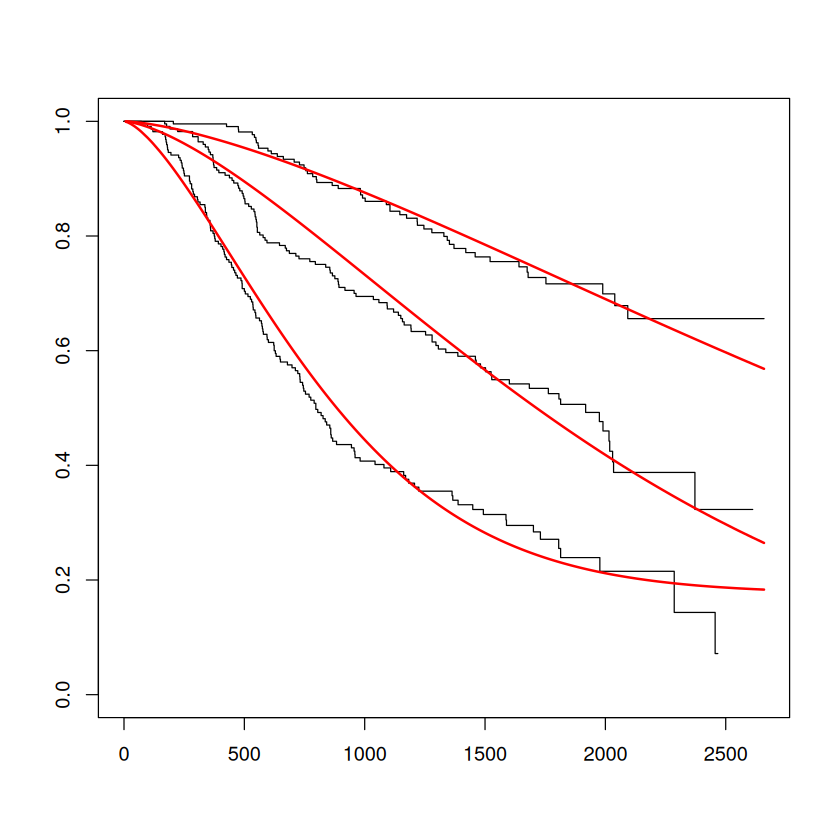

In [6]:
plot(cure_model_complex)

Non-mixture cure models can be fit by passing mixture=FALSE to flexsurvcure:

# Non-Mixture Cure Model


In [7]:
library(flexsurvcure)
cure_model_nmix <- flexsurvcure(Surv(rectime, censrec)~group, data=bc, link="loglog", dist="weibullPH", mixture=F)
print(cure_model_nmix)

Call:
flexsurvcure(formula = Surv(rectime, censrec) ~ group, data = bc, 
    dist = "weibullPH", link = "loglog", mixture = F)

Estimates: 
             data mean  est       L95%      U95%      se        exp(est)
theta              NA   6.35e-01  7.31e-01  5.17e-01        NA        NA
shape              NA   1.72e+00  1.53e+00  1.92e+00  1.01e-01        NA
scale              NA   3.07e-06  9.19e-07  1.03e-05  1.89e-06        NA
groupMedium  3.34e-01   8.35e-01  4.99e-01  1.17e+00  1.71e-01  2.31e+00
groupPoor    3.32e-01   1.63e+00  1.31e+00  1.95e+00  1.64e-01  5.09e+00
             L95%      U95%    
theta              NA        NA
shape              NA        NA
scale              NA        NA
groupMedium  1.65e+00  3.22e+00
groupPoor    3.69e+00  7.02e+00

N = 686,  Events: 299,  Censored: 387
Total time at risk: 771400
Log-likelihood = -2567.8, df = 5
AIC = 5145.6



# R package: cuRe

The cuRe package in R is specifically designed for fitting cure models in survival analysis. Cure models are used when a proportion of patients are considered cured and thus will not experience the event of interest (e.g., death, recurrence of disease).

### Key Features

#### Mixture and Non-mixture Cure Models: 
Supports both mixture and non-mixture cure models.

#### Flexible Baseline Hazards: 
Allows for various parametric distributions for baseline hazards, including Weibull, log-normal, and log-logistic.

#### Covariate Inclusion: 
Permits the inclusion of covariates in both the incidence (cure fraction) and latency (time to event) parts of the model.

#### Goodness-of-fit:
Provides diagnostic tools and goodness-of-fit measures for model evaluation.

Finding initial values... Completed!
Fitting the model... Completed!


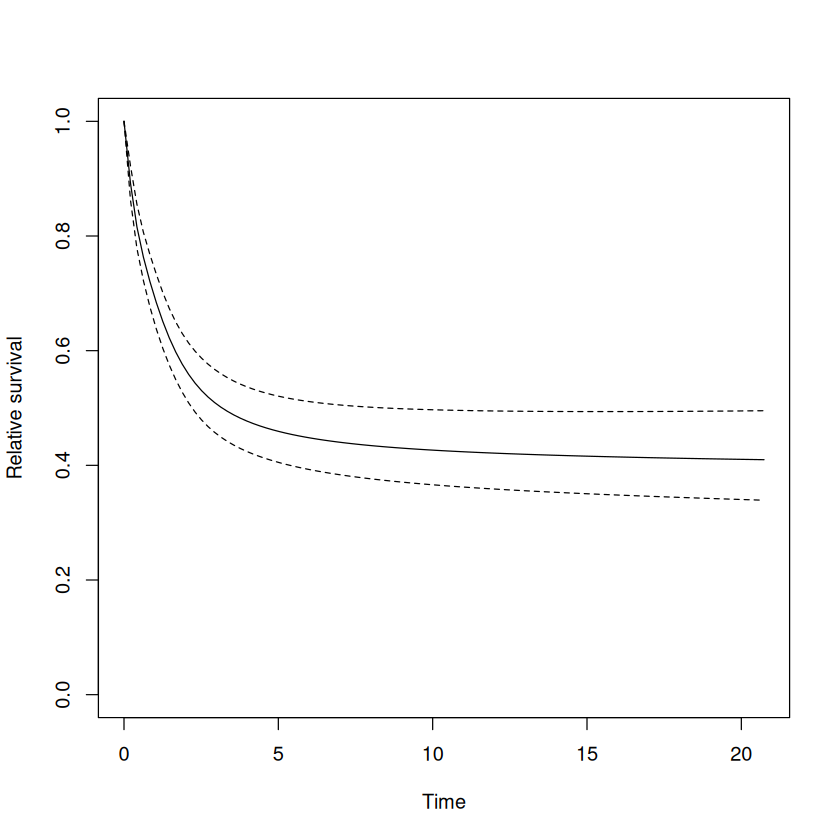

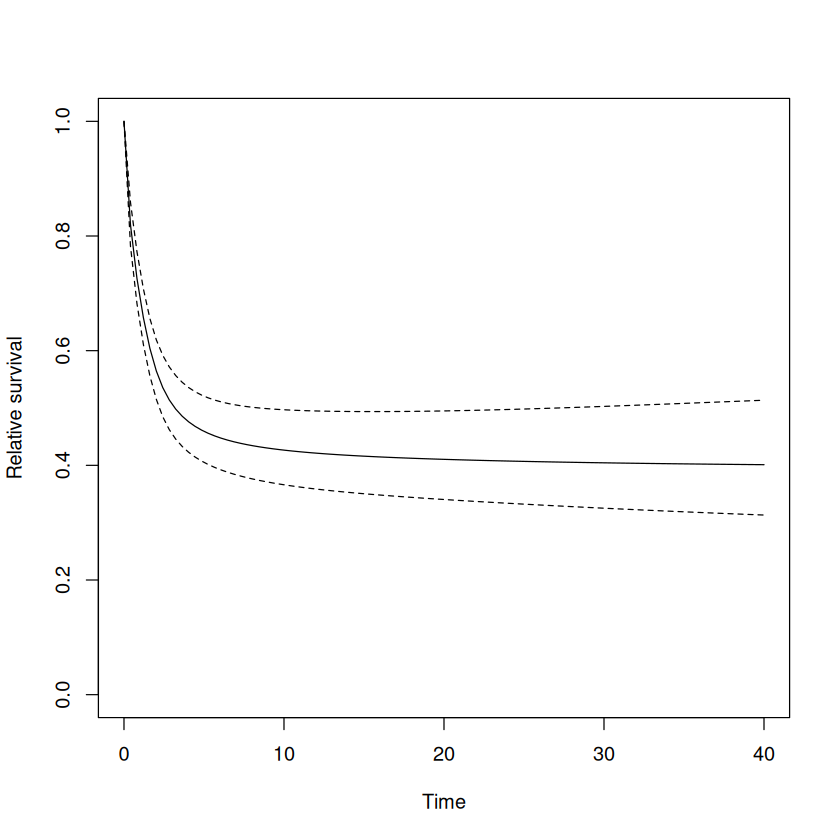

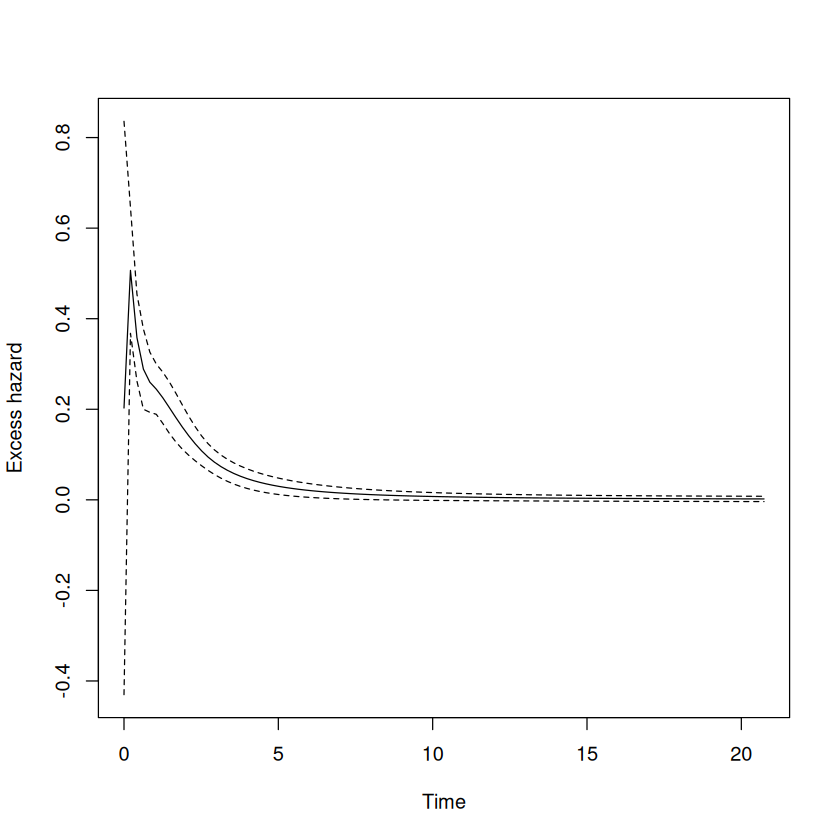

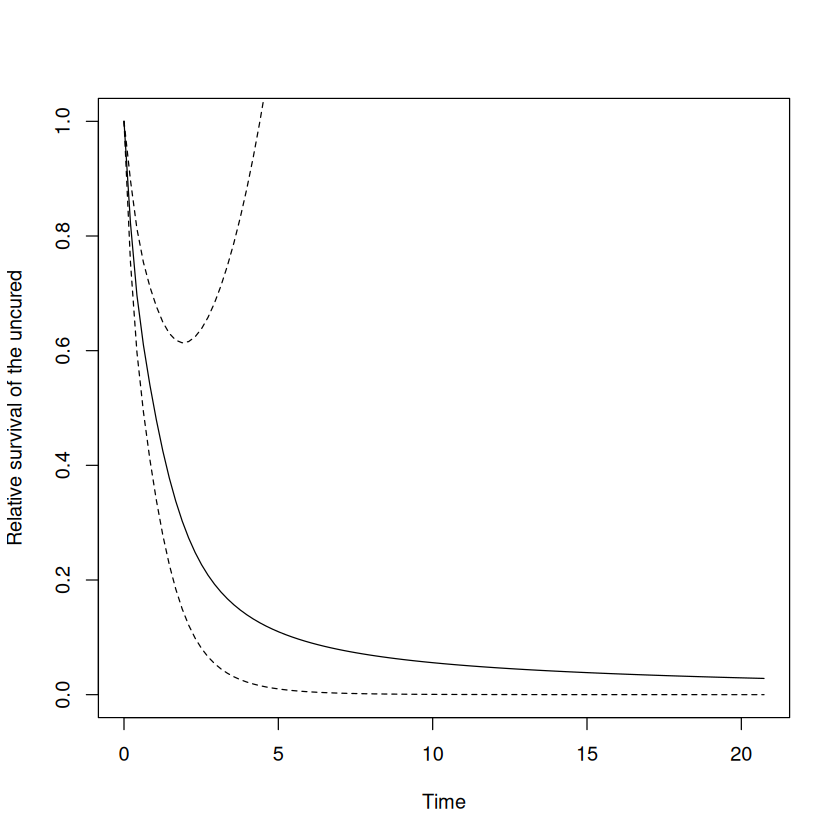

,Estimate,lower,upper
,<dbl>,<dbl>,<dbl>
1,0.392629,0.2112846,0.5699348


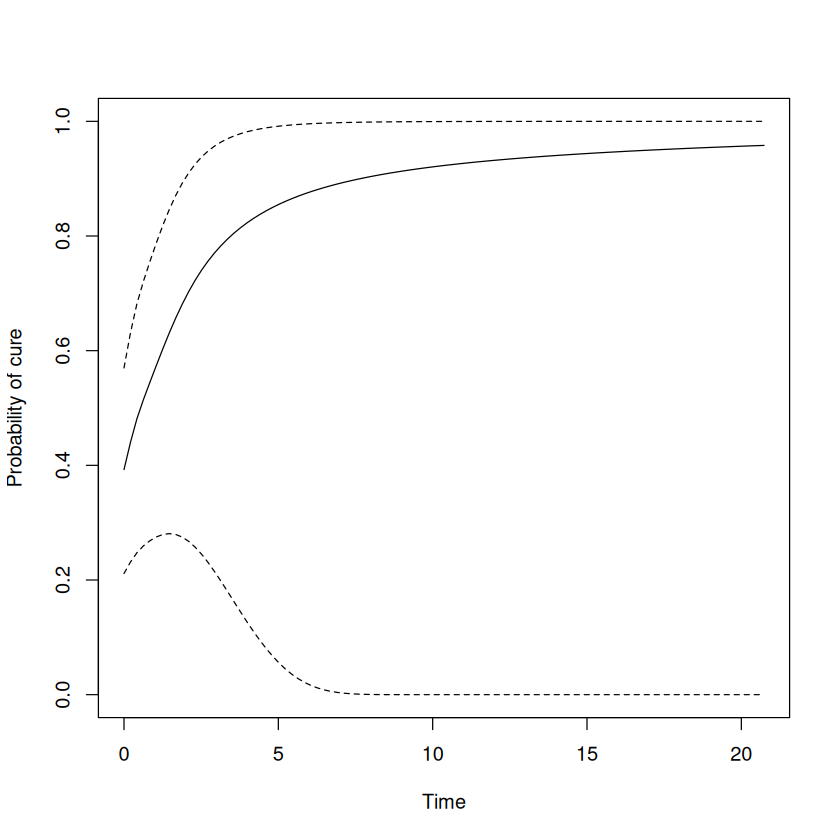

In [17]:
library(cuRe)

##Use data cleaned version of the colon cancer data from the rstpm2 package
data("colonDC")
set.seed(2)
colonDC <- colonDC[sample(1:nrow(colonDC), 400), ]

##Extract general population hazards
colonDC$bhaz <- general.haz(time = "FU", rmap = list(age = "agedays", sex = "sex", year= "dx"),
                            data = colonDC, ratetable = survexp.dk)

###Without covariates
##Fit mixture cure model
fit <- GenFlexCureModel(Surv(FUyear, status) ~ 1, data = colonDC, df = 4, bhazard = "bhaz")

##Plot model
plot(fit)
plot(fit, time = seq(0.001, 40, length.out = 100))
plot(fit, type = "hazard")
plot(fit, type = "survuncured")
plot(fit, type = "probcure")

##Predict cure proportion
predict(fit, type = "curerate")


Finding initial values... Completed!
Fitting the model... Completed!


,Estimate,lower,upper
,<dbl>,<dbl>,<dbl>
1,0.3930436,0.211343,0.5706014


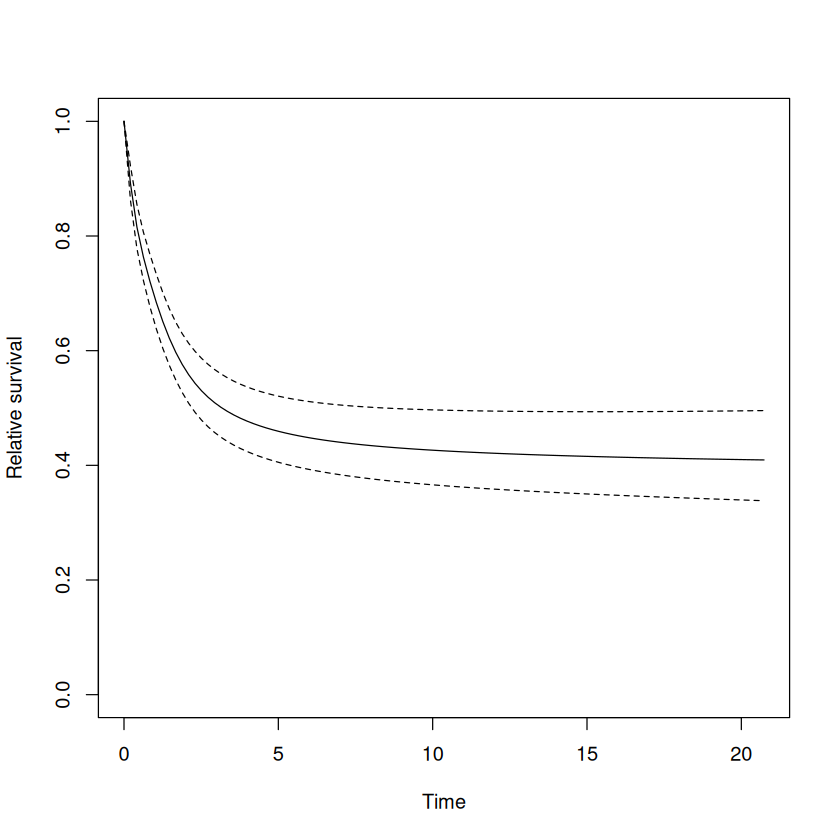

In [18]:
##Fit non-mixture cure model
fit <- GenFlexCureModel(Surv(FUyear, status) ~ 1, data = colonDC, df = 4,
                        bhazard = "bhaz", type = "nmixture")

##Plot relative survival
plot(fit)

##Predict cure proportion
predict(fit, type = "curerate")


Finding initial values... Completed!
Fitting the model... Completed!


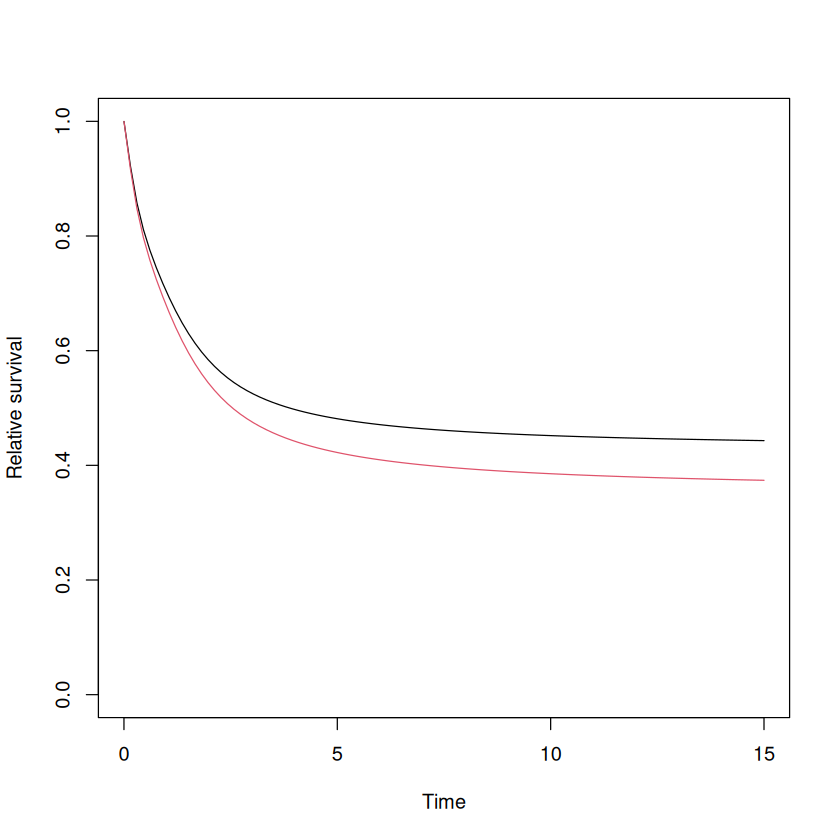

,Estimate,lower,upper
,<dbl>,<dbl>,<dbl>
1,0.3546418,0.1856082,0.5282946
,Estimate,lower,upper
,<dbl>,<dbl>,<dbl>
1,0.4295362,0.2764191,0.573863


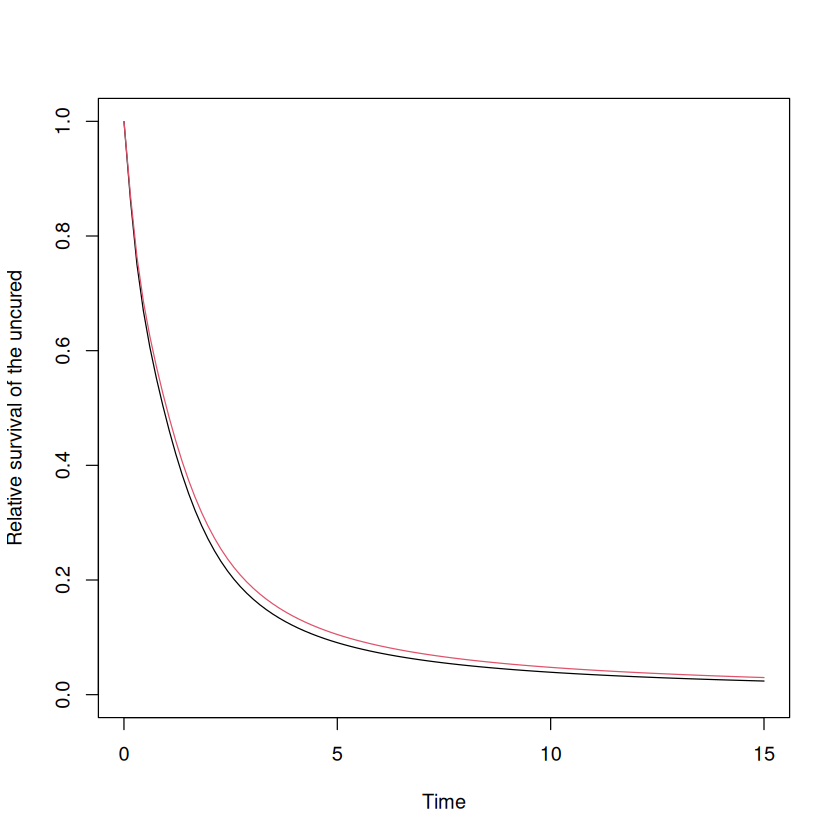

In [19]:
###With covariates
##Fit mixture cure model
fit <- GenFlexCureModel(Surv(FUyear, status) ~ sex, data = colonDC, df = 4,
                        bhazard = "bhaz", cr.formula = ~ sex)

##Plot model
plot(fit, newdata = data.frame(sex = factor("female", levels = c("male", "female"))),
     time = seq(0.001, 15, length.out = 100), ci = FALSE)
plot(fit, newdata = data.frame(sex = factor("male", levels = c("male", "female"))),
     time = seq(0.001, 15, length.out = 100), col = 2, ci = FALSE, add = TRUE)


plot(fit, newdata = data.frame(sex = factor("female", levels = c("male", "female"))),
     time = seq(0.001, 15, length.out = 100), ci = FALSE, type = "survuncured")
plot(fit, newdata = data.frame(sex = factor("male", levels = c("male", "female"))),
     time = seq(0.001, 15, length.out = 100), col = 2, ci = FALSE,
     add = TRUE, type = "survuncured")

predict(fit, type = "curerate",
        data.frame(sex = factor(c("male", "female"),
                                levels = c("male", "female"))))


Finding initial values... Completed!
Fitting the model... Completed!


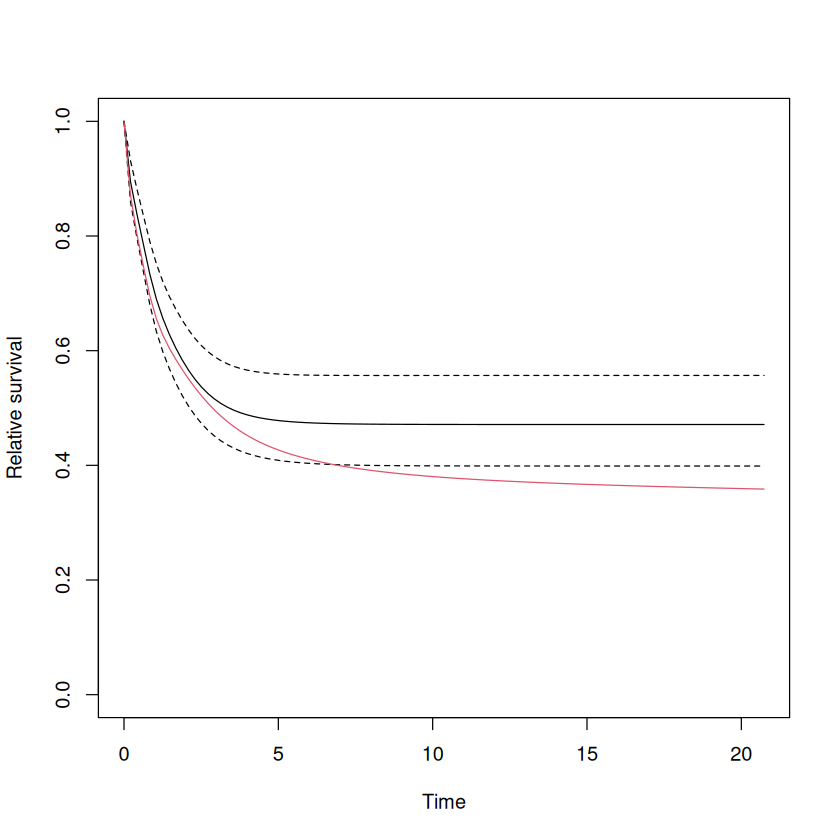

,Estimate,lower,upper
,<dbl>,<dbl>,<dbl>
1,0.4712109,0.3909206,0.5472772


,Estimate,lower,upper
,<dbl>,<dbl>,<dbl>
1,0.2036153,0.00301947,0.6462859


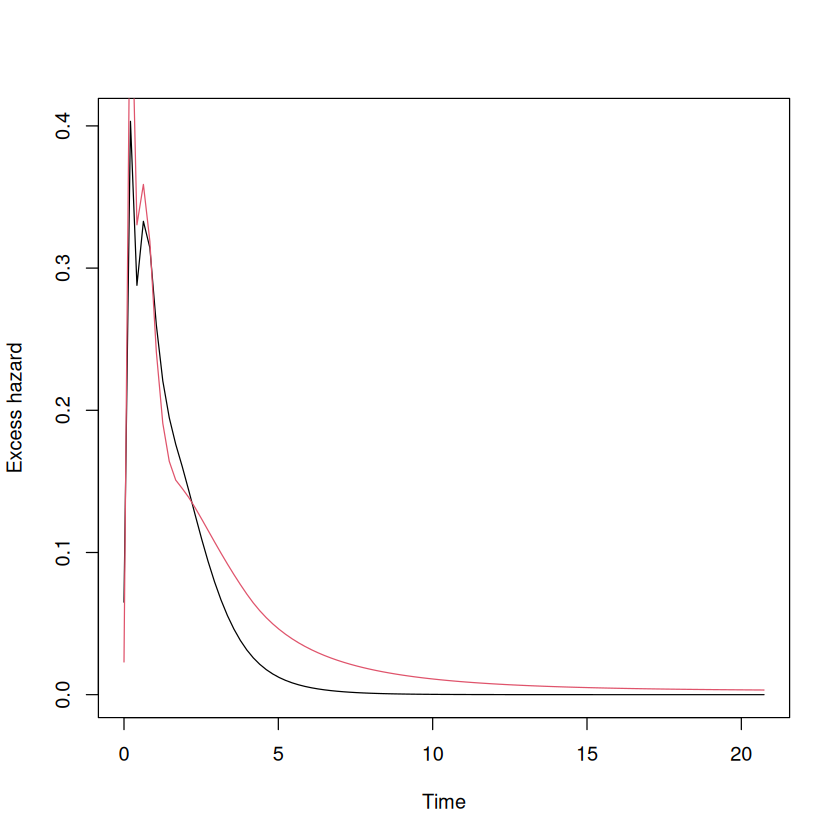

In [20]:

##Fit mixture cure model with time-varying covariates
colonDC$gender <- as.numeric(colonDC$sex) - 1
fit <- GenFlexCureModel(Surv(FUyear, status) ~ gender, data = colonDC, df = 6,
                        bhazard = "bhaz", cr.formula = ~ gender, tvc = list(gender = 2))

##Plot model
plot(fit, newdata = data.frame(gender = 0))
plot(fit, newdata = data.frame(gender = 1), add = TRUE, col = 2)

plot(fit, type = "hazard", newdata = data.frame(gender = 0), ci = FALSE)
plot(fit, type = "hazard", newdata = data.frame(gender = 1),
     add = TRUE, col = 2, ci = FALSE)

#Predict cure proportions for a male and female patients
predict(fit, type = "curerate", newdata = data.frame(gender = 0))
predict(fit, type = "curerate", newdata = data.frame(gender = 1))


# rstpm2 Package


The rstpm2 package in R is used for flexible parametric modeling of survival data, particularly with spline-based approaches. This package is well-suited for time-to-event data and allows for flexible modeling of hazard functions.

### Key Features

#### Spline-based Models:
Uses splines to model the baseline hazard function flexibly.

#### Time-varying Effects: 
Supports time-varying covariate effects.

#### Multi-state Models: 
Allows for the modeling of multi-state processes.

#### Diagnostics and Plots: 
Provides various diagnostic tools and plotting functions for model evaluation.

Warning message in data(lung):
“data set ‘lung’ not found”


Maximum likelihood estimation

Call:
stpm2(formula = Surv(time, status) ~ age + sex, data = lung, 
    df = 4)

Coefficients:
                          Estimate Std. Error z value     Pr(z)    
(Intercept)             -5.5286249  0.9391706 -5.8867 3.940e-09 ***
age                      0.0162050  0.0091916  1.7630  0.077897 .  
sex                     -0.5072641  0.1672622 -3.0327  0.002423 ** 
nsx(log(time), df = 4)1  4.4255382  0.6852245  6.4585 1.057e-10 ***
nsx(log(time), df = 4)2  4.4612587  0.4837180  9.2228 < 2.2e-16 ***
nsx(log(time), df = 4)3  7.8840443  1.3182567  5.9807 2.222e-09 ***
nsx(log(time), df = 4)4  4.9501240  0.3775680 13.1105 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

-2 log L: 2292.878 

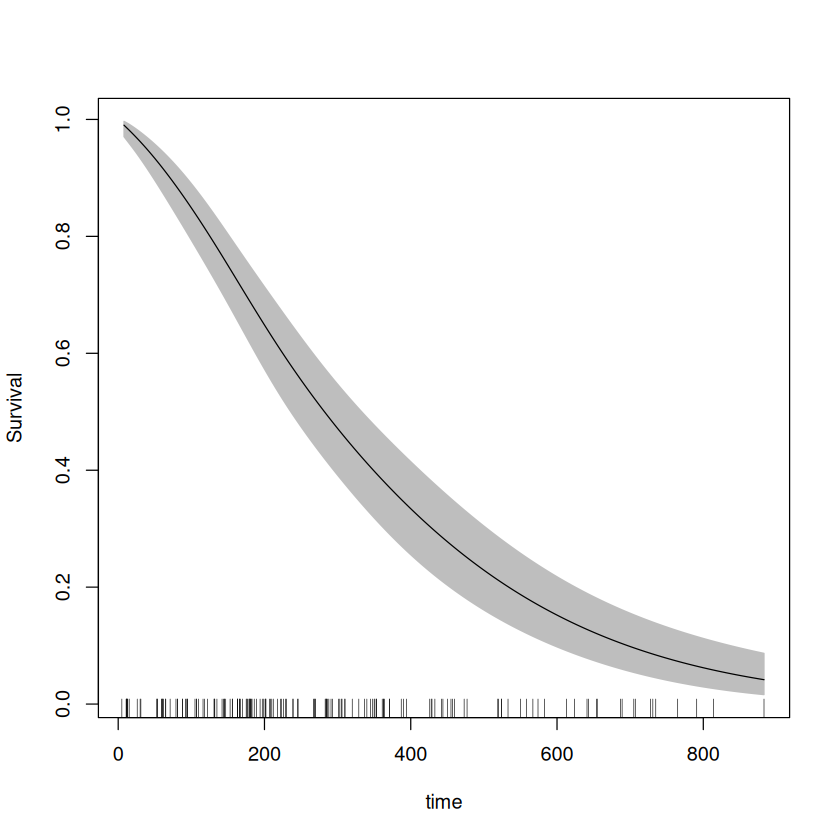

In [13]:
library(rstpm2)
library(survival)

# Example data: lung cancer survival data
data(lung)

# Fit a flexible parametric model using splines
fit <- stpm2(Surv(time, status) ~ age + sex, data = lung, df = 4)

# Summary of the model
summary(fit)

# Plot the survival curves
plot(fit, newdata = data.frame(age = 60, sex = 1), type = "surv")
